## EDA

In [1]:
import pandas as pd

In [2]:
data_new = pd.read_csv("../data/data_new.csv")
data_new.head()

,ts,number
0,2018-04-07 07:07:17,14626
1,2018-04-07 07:32:27,85490
2,2018-04-07 07:36:44,5408
3,2018-04-07 07:38:00,58940
4,2018-04-07 07:39:29,5408


In [3]:
##Top 50 users with most number of booking
df = data_new.groupby(['number']).count()

##data.number.value_counts()

top_50 = df.sort_values(by='ts',ascending=False)[0:50].reset_index()
bottom_50 = df.sort_values(by='ts',ascending=False)[-50:]


In [4]:
top_50.plot(kind='bar')

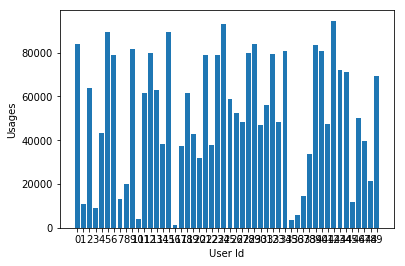

In [5]:
import matplotlib.pyplot as plt
#plt.bar(top_50['number'], top_50['ts'])
plt.bar(range(len(top_50['number'])),top_50['number'])
plt.xticks(range(len(top_50['number'])), top_50['number'].index)
plt.ylabel('Usages')
plt.xlabel('User Id')
plt.show()

In [6]:
top_50.columns = ['User_Id','Num_booking']
top_50.head()


,User_Id,Num_booking
0,83997,3652
1,10711,2902
2,64053,2849
3,8982,2628
4,43330,2555


## Feature Engineering

## Will there be a booking today?
1. is_weekend
2. is_weekday
3. is_start_of_week
4. is_wednesday
5. is_end_of_week
6. is_holidays


In [7]:
data_new.ts = data_new.ts.astype('datetime64[ns]')
data_new.dtypes

ts        datetime64[ns]
number             int64
dtype: object

In [8]:
#data_new.ts.dt.dayofweek.loc[data_new.ts.dt.dayofweek.isin([5,6])] 
data_new['is_weekend'] = data_new.ts.dt.dayofweek.isin([5,6])
data_new['is_weekday'] = data_new.ts.dt.dayofweek.isin(range(1,5))
#data_new['is_weekend'] = ~data_new['is_weekday']
data_new['is_start_of_week'] = data_new.ts.dt.dayofweek.isin([0,1])
data_new['is_wednesday'] = data_new.ts.dt.day_name().isin(['Wednesday'])
data_new['is_end_of_week'] = data_new.ts.dt.dayofweek.isin([3,4])



In [9]:
## Holiday data is stored in Holiday.csv
holiday_data = pd.read_csv("../data/Holiday.csv")
holiday_data.head()

,DAY,DATE,HOLIDAY
0,Tuesday,"Jan 01, 2019",New Year's Day
1,Monday,"Jan 14, 2019",Makar Sankranti / Pongal
2,Saturday,"Jan 26, 2019",Republic Day
3,Monday,"Mar 04, 2019",Maha Shivaratri
4,Thursday,"Mar 21, 2019",Holi


In [10]:
holiday_data.dtypes

DAY        object
DATE       object
HOLIDAY    object
dtype: object

In [11]:
holiday_data.DAY = holiday_data.DAY.apply(str)
holiday_data.DATE = holiday_data.DATE.astype('datetime64[ns]')
holiday_data.HOLIDAY = holiday_data.HOLIDAY.apply(str)


In [12]:
holiday_data.dtypes

DAY                object
DATE       datetime64[ns]
HOLIDAY            object
dtype: object

In [13]:
data_new['is_holidays'] = data_new.ts.dt.date.isin(holiday_data.DATE.dt.date)

In [14]:
data_new.ts.max()

Timestamp('2019-04-07 23:59:59')

In [15]:
data_new.ts.min()

Timestamp('2018-04-07 01:23:31')

In [16]:
data_new.head()

,ts,number,is_weekend,is_weekday,is_start_of_week,is_wednesday,is_end_of_week,is_holidays
0,2018-04-07 07:07:17,14626,True,False,False,False,False,False
1,2018-04-07 07:32:27,85490,True,False,False,False,False,False
2,2018-04-07 07:36:44,5408,True,False,False,False,False,False
3,2018-04-07 07:38:00,58940,True,False,False,False,False,False
4,2018-04-07 07:39:29,5408,True,False,False,False,False,False


In [17]:
data_new[data_new.is_holidays==True].is_holidays.count()

417804

In [18]:
#Writing residual data to new file
data_new['date'] = data_new.ts.dt.date
data_new.drop("ts",axis=1,inplace=True)

In [20]:
data_new.head()

,number,is_weekend,is_weekday,is_start_of_week,is_wednesday,is_end_of_week,is_holidays,date
0,14626,True,False,False,False,False,False,2018-04-07
1,85490,True,False,False,False,False,False,2018-04-07
2,5408,True,False,False,False,False,False,2018-04-07
3,58940,True,False,False,False,False,False,2018-04-07
4,5408,True,False,False,False,False,False,2018-04-07


In [21]:
data_new.to_csv("../data/rapido_feature_engineered.csv",index=False)